In [1]:
import requests # 웹 페이지 소스를 얻기 위한 패키지(기본 내장 패키지이다.)
from bs4 import BeautifulSoup # 웹 페이지 소스를 얻기 위한 패키지, 더 간단히 얻을 수 있다는 장점이 있다고 한다.
from datetime import datetime                                # (!pip install beautifulsoup4 으로 다운받을 수 있다.)
import pandas as pd # 데이터를 처리하기 위한 가장 기본적인 패키지
import time # 사이트를 불러올 때, 작업 지연시간을 지정해주기 위한 패키지이다. (사이트가 늦게 켜지면 에러가 발생하기 때문)
import urllib.request #
import json
import re     
import datetime as dt
import os
import glob
from pandas import DataFrame
from collections import Counter
from konlpy.tag import Twitter
from konlpy.tag import Kkma
from konlpy.tag import Mecab
import numpy as np
import matplotlib as mpl
from wordcloud import WordCloud
#import matplotlib.pyplot as plt
import matplotlib.pylab as plt
import seaborn as sns
import matplotlib.font_manager as fm
font_name = fm.FontProperties(fname = 'C:\\Windows\\Fonts\\malgun.ttf').get_name()
plt.rc('font', family = font_name)
mpl.rcParams['axes.unicode_minus'] = False
from tqdm import tqdm_notebook




In [105]:
f= pd.read_csv('불용어사전(한글자).csv',encoding='cp949')
stop_list = list(f)
Unnamed = 'Unnamed: '+ str(len(stop_list)-1)
stop_list.extend(['거','저','내','더','용','앞','만','도','앜','후','윤','분','늘','멀','줄','욬','수','번','안','이','제','요','안','뭐','더','전'])
stop_words = set(stop_list)

stop_words.remove(Unnamed)

# stop_words

# 단어 새로 추가했을 때에 사용!!!
f = open('불용어사전(한글자).csv','w')
for i in stop_words:
    f.write(i+',')
f.close()


In [83]:
# # 인코딩 에러뜰때만 실행
# youtube_channel = input("유투브 채널 이름 입력하시오.")
# date = pd.read_csv(youtube_channel+'/'+youtube_channel+'_info.csv',encoding='euc-kr')

유투브 채널 이름 입력하시오.회사원A


In [84]:
# # 인코딩 에러뜰때만 실행


# date.to_csv(youtube_channel+'/'+youtube_channel+'_info.csv',encoding='utf-8-sig')

유투브 채널 이름 입력하시오.회사원A
2020. 5. 30.
2020. 5. 29.
2020. 5. 22.
2020. 5. 16.
2020. 5. 15.
2020. 5. 9.
2020. 5. 2.
2020. 4. 24.
2020. 4. 18.
2020. 4. 11.
2020. 4. 4.
2020. 4. 1.
2020. 4. 1.
0
1
2
3
4
5
6
7
8
9
10
11
12


C:\Users\zmfkv\anaconda3\lib\site-packages\ipykernel_launcher.py:22: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


C:\Users\zmfkv\anaconda3\lib\site-packages\ipykernel_launcher.py:132: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



{'진짜': 422, '회사원': 340, '언니': 338, '영상': 273, '피부': 259, '보고': 216, '설화수': 156, '머리': 110, '제품': 98, '체': 92, '파운데이션': 92, '정말': 90, '꼭': 88, '같아요': 86, '좋은': 84, '옷': 78, '요즘': 74, '급식': 73, '화장': 72, '오늘': 72, '한번': 71, '메이크업': 69, '느낌': 66, '사람': 64, '에센스': 64, '바이옴': 61, '생각': 60, '아니': 58, '얼굴': 57, '이번': 55, '항상': 54, '말': 53, '완전': 52, '레오': 52, '알': 51, '대박': 50, '있는': 49, '트루': 49, '때문': 48, '마스크': 46, '사용': 44, '같은': 44, '이벤트': 44, '댓글': 44, '커버': 44, '지금': 41, '입니다': 41, '채널': 41, '개': 41, '제이': 41}


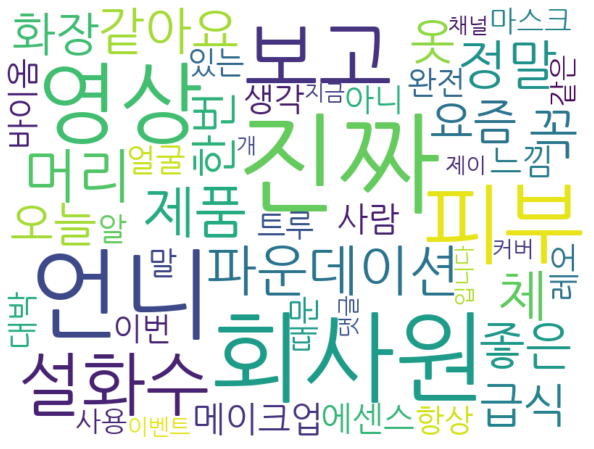

In [110]:
# 파일 합치는 곳 (폴더 제목 입력)
# 댓글에 날짜 추가!!!
youtube_channel = input("유투브 채널 이름 입력하시오.")
date = pd.read_csv(youtube_channel+'/'+youtube_channel+'_info.csv')
ccc = date[date['start_date'] >= '2020. 4. 1']['start_date']

ccc
# pd.read_csv('./Beauty/'+youtube_channel+'/comment/'+youtube_channel+'_comment_[i+1].csv')

for i in ccc:
     print(i)
#     a = pd.read_csv(('./Beauty/'+youtube_channel+'/comment/'+youtube_channel+'_comment_{}.csv').format(i+1))['youtube'].values
#     np.append(comment_date, a)     up_date = pd.read_csv(('./Beauty/'+youtube_channel+'/comment/'+youtube_channel+'_comment_{}.csv').format(i+1))
#     comment_date.append(up_date)
comment_date = []
for i in range(len(ccc)):
     print(i)
     a = pd.read_csv((youtube_channel+'/comment/'+youtube_channel+'_comment_{}.csv').format(i+1))
     comment_date.append(a)
        
comment_date[0]
for i in tqdm_notebook(range(len(ccc))):
    
    df = comment_date[i]
    you_id = df['youtube_id'].values
    co_id = df['comment'].values
    likes = df['like_num'].values
    start_date = ccc[i]
    comment_final = pd.DataFrame(data = {'닉네임':you_id,
                                '댓글':co_id,
                                '좋아요수':likes,
                                '날짜':start_date})
    comment_final.to_csv(youtube_channel+'/comment/'+ youtube_channel +'_comment_date{}.csv'.format(i+1),
                        encoding='utf-8-sig',index=False)    


path =  str(youtube_channel) + "/comment"
path2 = str(youtube_channel) + '/result.csv'
arg_youtube = str(youtube_channel) + "*"


allFile_list = glob.glob(os.path.join(path,arg_youtube))
#print(allFile_list)
allData = []
for file in allFile_list:
    if 'date' in file:
        # print(file)
        df = pd.read_csv(file)
        allData.append(df)
    
dataCombine = pd.concat(allData,axis =0, ignore_index = True)

dataCombine.to_csv(path2, index = False)
cdPath = str(youtube_channel) + '/result.csv'
comment_data = pd.read_csv(cdPath)
comment_data ##제대로 출력되는지 확인
com_list = list(comment_data['댓글'])   ##제대로 출력되는지 확인
# com_list   ##제대로 출력되는지 확인

# ### 추출된 단어가 무슨 형태인지 파악
# # for sentence in com_list:
# #     morph = twitter.pos(sentence)
# #     sentences_tag.append(morph)

# 추출 단어들 저장

def get_noun(comment_txt):
    
    twitter = Twitter()
    noun_list = []
    
    if len(comment_txt) > 0:
        twitter = twitter.pos(comment_txt, norm = True, stem = True)
        for word, tag in twitter:
            if tag in ['Noun']:
                
                if word not in stop_words:
                    noun_list.append(word)
                    
    return noun_list

def get_adj(comment_txt):

    twitter = Twitter()
    adj_list = []
    
    if len(comment_txt) > 0:
        twitter = twitter.pos(comment_txt, norm = True, stem = True)
        for word, tag in twitter:
            if tag in ['Adjective']:
                if word not in stop_words:
                    adj_list.append(word)
                    
    return adj_list

def get_verb(comment_txt):

    twitter = Twitter()
    verb_list = []
    
    if len(comment_txt) > 0:
        twitter = twitter.pos(comment_txt, norm = True, stem = True)
        for word, tag in twitter:
            if tag in ['Verb']:
                if word not in stop_words:
                    verb_list.append(word)
    return verb_list

comment_list = []
for i in range(len(comment_data)):
    comment_list.append(comment_data['댓글'].iloc[i])
    
comment_result = []

for i in comment_list:
    comment_result.append(i)
    
comment_result = pd.DataFrame(comment_result, columns=["comment"])
    
#cloud.to_file(youtube_channel+'/{}wordcloud.png'.format(youtube_channel)) # 해당폴더에 자동저장
comment_result['noun'] = comment_result['comment'].apply(lambda x: get_noun(x))
comment_result['adj'] = comment_result['comment'].apply(lambda x: get_adj(x))
comment_result['verb'] = comment_result['comment'].apply(lambda x: get_verb(x))

comment_result.to_csv(youtube_channel +'/{}token_result.csv'.format(youtube_channel),
                                                                   index = False, encoding = 'utf-8-sig')


twitter = Twitter()

sentences_tag = []
for sentence in tqdm_notebook(com_list):
     morph = twitter.pos(sentence)
     sentences_tag.append(morph)

stop_words
for sentence in comment_data:
    morph = twitter.pos(sentence)
    sentences_tag.append(morph)
#     print(morph)
#     print('-'*30)

# print(sentences_tag)
# print(len(sentences_tag))
# print('\n'*3)

noun_adj_list = []
for sentence1 in sentences_tag:
    for word, tag in sentence1:
        if tag in ['Noun','Adjective','verb']:
            if word not in stop_words:
                noun_adj_list.append(word)            

counts = Counter(noun_adj_list)
select_data = counts.most_common(50)


wc = WordCloud(font_path='NanumGothic.ttf',max_font_size=150,background_color='white' ,width=800, height=600)
    
print(dict(select_data))
cloud = wc.generate_from_frequencies(dict(select_data))
plt.figure(figsize=(12, 8))
plt.axis('off')
plt.imshow(cloud,interpolation='bilinear')
plt.show()
cloud.to_file(youtube_channel+'/{}wordcloud.png'.format(youtube_channel)) # 해당폴더에 자동저장